# Introduction to gradients

In [25]:
import Magics.macro as magics
import xarray as xr
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import clear_output

### Set not contouring parameters and load the data

In [2]:
projection = magics.mmap(
    subpage_map_library_area = "on",
    subpage_map_area_name    = "europe"
)

coast = magics.mcoast()

legend = magics.mlegend(legend_display_type       = 'continuous',
                        legend_automatic_position = 'right')

In [6]:
hcct = magics.mgrib(grib_input_file_name = 'data/hcct.grib')
vis  = magics.mgrib(grib_input_file_name = "data/visibility.grib")
tp   = magics.mgrib(grib_input_file_name = "data/total_precipitation.grib")
wv   = magics.mgrib(grib_input_file_name = "data/wv_62.grib",
                    grib_automatic_scaling = "off")
probability = magics.mgrib(grib_input_file_name = 'data/fg_prob.grib')

Jupyter notebooks have this handy colour picker we can use to define colours.

### How do gradients work?
Unlike the list of colours, where we have one colour between each 2 levels, here we give Magics **one colour for evey value in contour level list**.  

Other things we need to tell Magics:
- technique and direction to interpolate the colours (rgb, hcl, hsl)
- where to put the border colour (left, right, on both side, or not use at all)
- how many levels between each 2 colours we want

### Example 1

In [ ]:

my_contour = magics.mcont(
    legend                                = "on",
    contour                               = "off",
    contour_level_selection_type          = "level_list",
    contour_level_list                    = [0.,500,2000,6000,10000,40000],
    contour_label                         = "off",
    contour_shade                         = "on",
    contour_shade_method                  = "area_fill", 
    contour_shade_colour_method           = "gradients",
    contour_gradients_colour_list         = ["magenta",
                                             "yellow",
                                             "yellowish_green",
                                             "ecmwf_blue",
                                             "RGB(0.74,0.8,0.92)",
                                             "white"],
    contour_gradients_waypoint_method     = "left",
    contour_gradients_technique           = "hsl",
    contour_gradients_technique_direction = "anti_clockwise",
    contour_gradients_step_list           = [5, 3, 4, 2, 3]
    )
magics.plot(projection,vis,my_contour,coast,legend)

### Example 2

In [ ]:
#set up the contours
my_contour = magics.mcont(
    contour_shade_technique               = "grid_shading",
    legend                                = "on",
    contour                               = "off",
    contour_level_selection_type          = "level_list",
    contour_level_list                    = [0.,2000,4000,6000,14000,22000],
    contour_label                         = "off",
    contour_shade                         = "on",
    contour_shade_colour_method           = "gradients",
    contour_shade_method                  = "area_fill",
    contour_gradients_colour_list         = ["RGB(0.7843,0.7843,0.7843)",
                                             "RGB(0.5882,0.5882,0.5882)",
                                             "RGB(0.9112,0.8035,0.2653)",
                                             "RGB(0.2653,0.9112,0.9112)",
                                             "RGB(0.2653,0.2653,0.9112)",
                                             "RGB(0.9112,0.2653,0.9112)"],
    contour_gradients_waypoint_method     = "left",
    contour_gradients_technique           = "hsl",
    contour_gradients_technique_direction = "anti_clockwise",
    contour_gradients_step_list           = [2,2,2,4,4])
magics.plot(projection,hcct,my_contour,coast,legend)

### Example 3

If we want to interpolate between only 2 colours but don't want to use RGB colour space, we can use gradients and interpolate in hsl/hcl space

In [46]:
a =widgets.ColorPicker(concise=False,description='Pick a color',value='#e04ce0',disabled=False)
b = widgets.ColorPicker(concise=False,description='Pick a color',value='#e04ce0',disabled=False)
ui = widgets.HBox([a, b])
def f(a, b):
    print((a, b))

out = widgets.interactive_output(f, {'a': a, 'b': b})

display(ui, out)

Output()

In [ ]:
my_contour = magics.mcont(
    legend                            = "on",
    contour                           = "off",
    contour_level_selection_type      = "level_list",
    contour_level_list                = [10.,100],
    contour_interpolation_ceiling     = 99.9999,
    contour_label                     = "off",
    contour_shade                     = "on",
    contour_shade_colour_method       = "gradients",
    contour_shade_method              = "area_fill",
    contour_gradients_colour_list     = ["#31dbe7","e04ce0"],
    contour_gradients_waypoint_method = "left",
    contour_gradients_technique       = "hsl",
    contour_gradients_step_list       = [9]
    )
magics.plot(projection,probability,my_contour,coast,legend)

### Example 4

In [58]:
a =widgets.ColorPicker(concise=False,description='2',value='#dff8e5',disabled=False)
b = widgets.ColorPicker(concise=False,description='10',value='#16c21e',disabled=False)
c =widgets.ColorPicker(concise=False,description='25',value='#316f13',disabled=False)
d = widgets.ColorPicker(concise=False,description='100',value='#e1e100',disabled=False)
e =widgets.ColorPicker(concise=False,description='300',value='#f00000',disabled=False)

ui = widgets.VBox([a, b, c, d, e])
def f(a, b, c, d, e):
    print([a, b, c, d, e])

out = widgets.interactive_output(f, {'a': a, 'b': b, 'c': c, 'd': d, 'e': e})

display(ui, out)

Output()

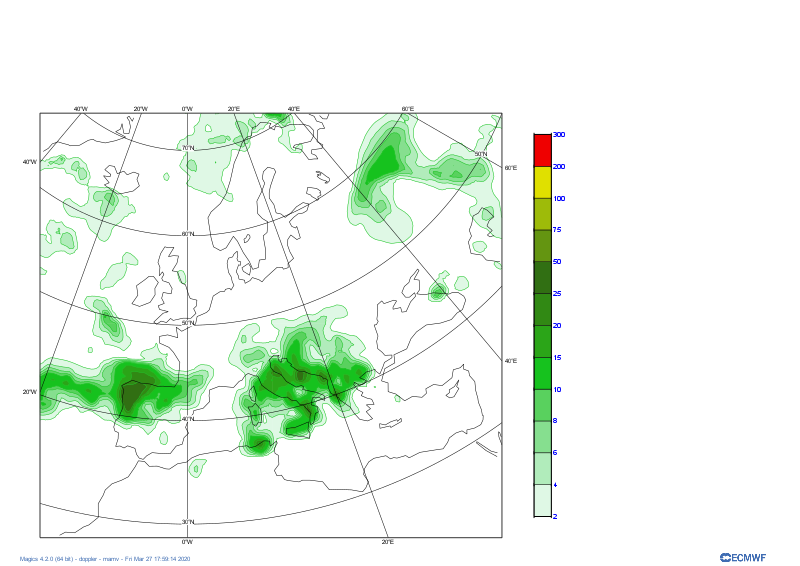

In [57]:
my_contour = magics.mcont(
    legend                            = "on",
    contour_line_colour               = "RGB(0.08637,0.7607,0.1201)",
    contour_highlight                 = "off",
    contour_level_selection_type      = "level_list",
    contour_level_list                = [2.,10,25,100,300],
    contour_label                     = "off",
    contour_shade                     = "on",
    contour_shade_colour_method       = "gradients",
    contour_gradients_technique       = "hcl",
    contour_shade_method              = "area_fill",
    contour_gradients_colour_list     = ["#dff8e5",
                                         "#16c21e",
                                         "#316f13",
                                         "#e1e100",
                                         "#f00000"],
    contour_gradients_waypoint_method = "right",
    contour_gradients_step_list       = [4,3,3,2]
    )
magics.plot(projection,tp,my_contour,coast,legend)

### Example 5

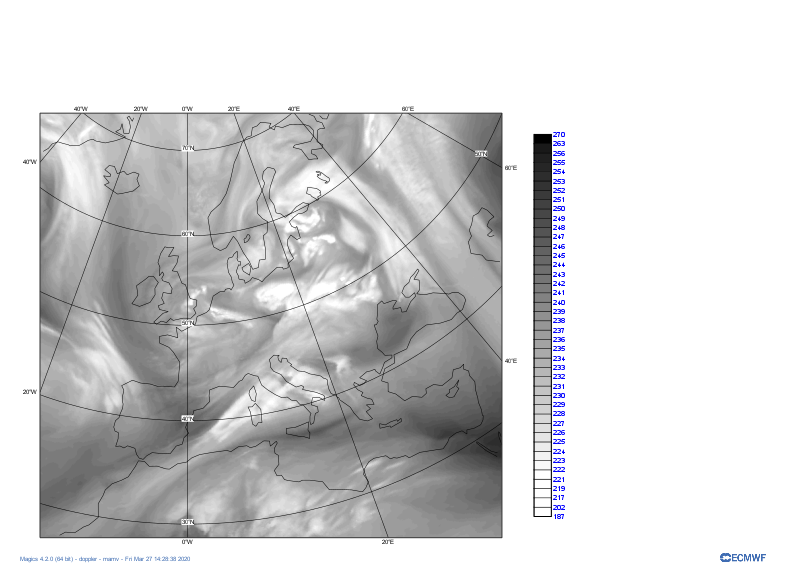

In [9]:
my_contour = magics.mcont(
    legend                            = "on",
    contour                           = "off",
    contour_level_selection_type      = "level_list",
    contour_level_list                = [187.,217.,221.,256.,270.],
    contour_label                     = "off",
    contour_shade                     = "on",
    contour_shade_technique           = "cell_shading",
    contour_shade_colour_method       = "gradients",
    contour_gradients_technique       = "rgb",
    contour_shade_cell_resolution     = 40,
    contour_gradients_colour_list     = ["white","white","white","RGB(0.1,0.1,0.1)","black"],
    contour_gradients_waypoint_method = "right",
    contour_gradients_step_list       = [2,2,35,2]
    )
magics.plot(projection,wv,my_contour,coast,legend)